# Author : Harshit Srivastava
# Data Science And Business Analytics Internship
# GRIP The Spark Foundation
# GRIPNOV20

# Task-5
* Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
* As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.
* Dataset: https://bit.ly/34SRn3b


# Import all libraries

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Reading Dataset
df = pd.read_csv("matches.csv")

In [3]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
#First five Rows
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#Last five Rows
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


# Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
df.shape

(756, 18)

In [8]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
df.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [10]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Heat Map

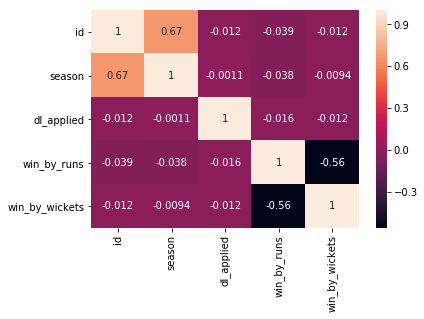

In [11]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [12]:
df['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
AD Mathews         1
CL White           1
S Gill             1
DJG Sammy          1
HH Gibbs           1
Name: player_of_match, Length: 226, dtype: int64

In [13]:
df['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
Name: player_of_match, dtype: int64

In [14]:
list(df['player_of_match'].value_counts().keys())

['CH Gayle',
 'AB de Villiers',
 'MS Dhoni',
 'RG Sharma',
 'DA Warner',
 'YK Pathan',
 'SR Watson',
 'SK Raina',
 'G Gambhir',
 'AM Rahane',
 'MEK Hussey',
 'V Kohli',
 'AD Russell',
 'A Mishra',
 'DR Smith',
 'V Sehwag',
 'KA Pollard',
 'JH Kallis',
 'SE Marsh',
 'SP Narine',
 'AT Rayudu',
 'RA Jadeja',
 'Harbhajan Singh',
 'UT Yadav',
 'SR Tendulkar',
 'Rashid Khan',
 'AC Gilchrist',
 'RV Uthappa',
 'HH Pandya',
 'A Nehra',
 'BJ Hodge',
 'M Vijay',
 'S Dhawan',
 'SL Malinga',
 'RR Pant',
 'SV Samson',
 'BB McCullum',
 'Sandeep Sharma',
 'B Kumar',
 'SC Ganguly',
 'JJ Bumrah',
 'SPD Smith',
 'JP Faulkner',
 'GJ Maxwell',
 'PA Patel',
 'JC Buttler',
 'JD Unadkat',
 'KC Sangakkara',
 'DW Steyn',
 'Yuvraj Singh',
 'DPMD Jayawardene',
 'AJ Finch',
 'ML Hayden',
 'N Rana',
 'MK Pandey',
 'NM Coulter-Nile',
 'CA Lynn',
 'JP Duminy',
 'SS Iyer',
 'SK Warne',
 'KL Rahul',
 'F du Plessis',
 'AR Patel',
 'KH Pandya',
 'KD Karthik',
 'DA Miller',
 'KP Pietersen',
 'A Kumble',
 'DJ Bravo',
 'LRP

In [15]:
list(df['player_of_match'].value_counts()[0:5].keys())

['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'RG Sharma', 'DA Warner']

In [16]:
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [17]:
df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [18]:
batting_first=df[df['win_by_runs']!=0]

In [19]:
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


# Matches we have got in the dataset

In [20]:
df['id'].max()

11415

# Seasons we have got in the dataset

In [21]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [22]:
len(df['season'].unique())

12

# 1. Team won by Maximum Runs 

In [23]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

# 2. Team won by Minimum Runs

In [24]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

# 3. Team won by Maximum Wickets

In [25]:
df.iloc[df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

# 4. Team won by Minimum Wickets

In [26]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

**Conclude**
1. **Mumbai Indians** is the team which won by maximum and minimum **runs**
2. **Kolkata Knight Riders** is the team which won by maximum and minimum **wickets** 

# Data Visualization

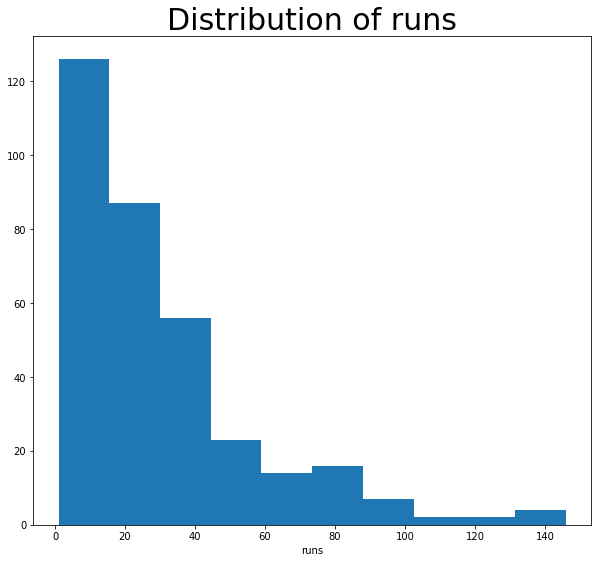

In [27]:
plt.figure(figsize=(10,9))
plt.hist(batting_first['win_by_runs'])
plt.title('Distribution of runs')
plt.title('Distribution of runs',fontsize=30)
plt.xlabel("runs")
plt.show()

# 1. Batting first Winner

In [28]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

In [29]:
batting_first['winner'].value_counts().keys()

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Delhi Daredevils',
       'Deccan Chargers', 'Pune Warriors', 'Rising Pune Supergiant',
       'Delhi Capitals', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Gujarat Lions'],
      dtype='object')

In [30]:
batting_first['winner'].value_counts()[0:5].keys()

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore'],
      dtype='object')

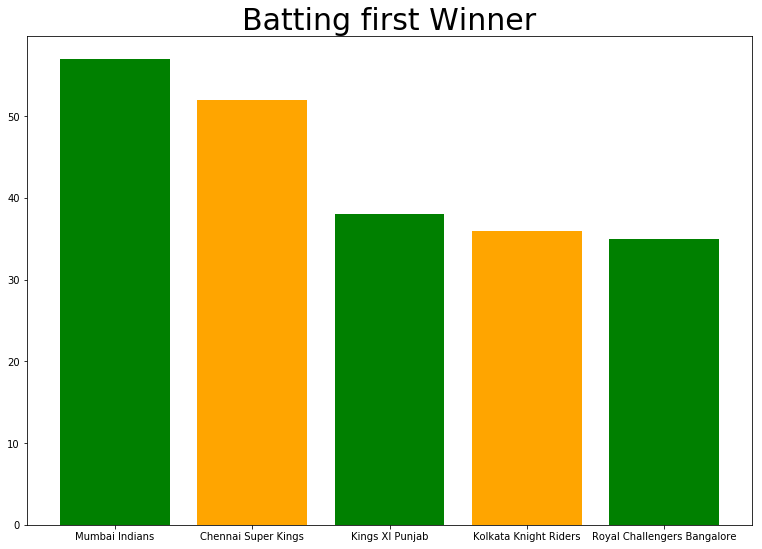

In [31]:
plt.figure(figsize=(13,9))
plt.title('Batting first Winner',fontsize=30)
plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()),list(batting_first['winner'].value_counts())[0:5],color=["green","orange"])
plt.show()


# 2. Batting second Winner

In [32]:
batting_second=df[df['win_by_wickets']!=0]

In [33]:
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [34]:
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

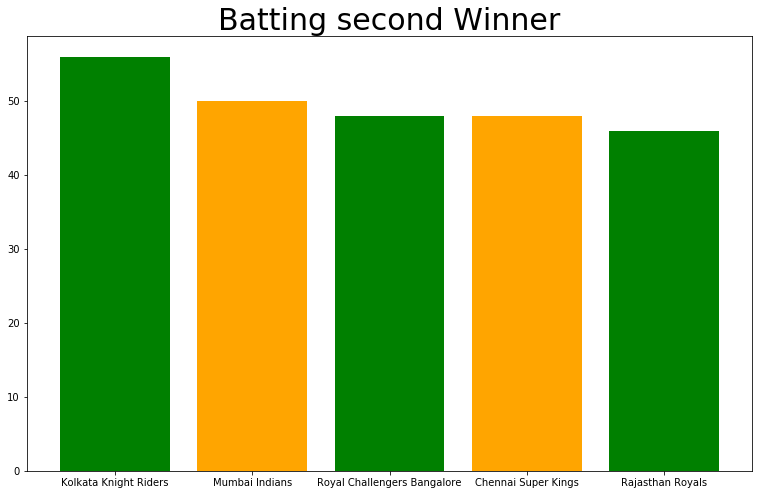

In [35]:
plt.figure(figsize=(13,8))
plt.bar(list(batting_second['winner'].value_counts()[0:5].keys()),list(batting_second['winner'].value_counts())[0:5],color=["green","orange"])
plt.title('Batting second Winner',fontsize=30)
plt.show()

# 3. Win by wickets

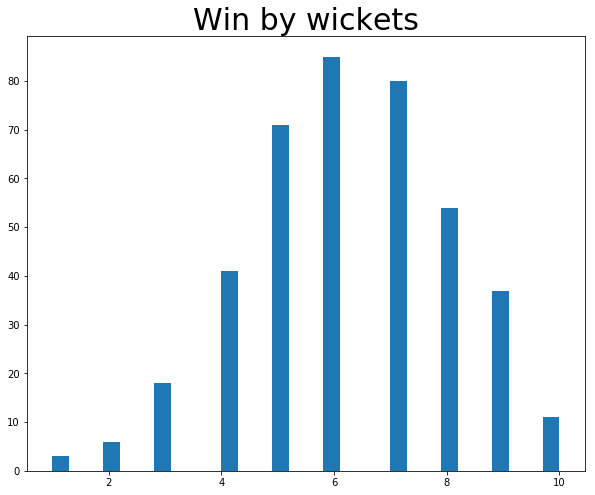

In [36]:
plt.figure(figsize=(10,8))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.title('Win by wickets',fontsize=30)
plt.show()

# 4. Season which had most number of Matches

In [37]:
df['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

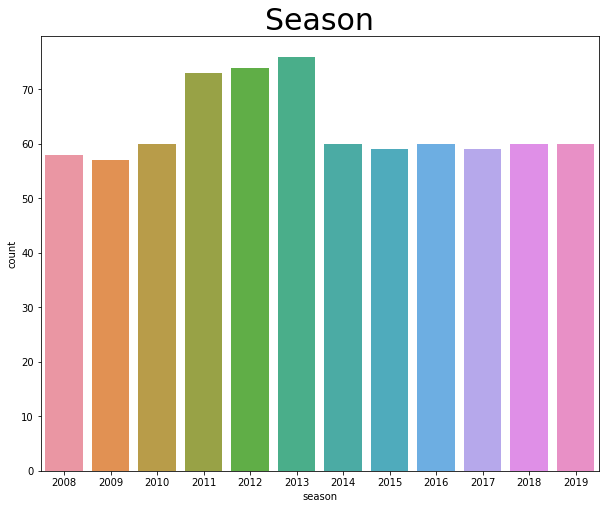

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='season', data=df)
plt.title('Season',fontsize=30)
plt.show()

In **2013**, we have the most number of matches

# 5. City 

In [39]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Cape Town           7
Abu Dhabi           7
Cuttack             7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

# 6. Top player of the match Winners

<Figure size 720x648 with 0 Axes>

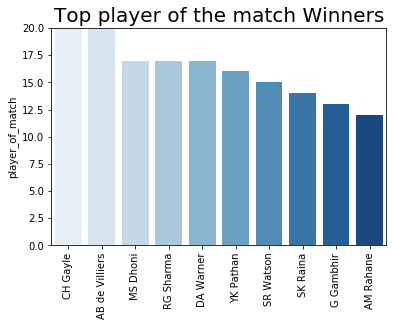

In [40]:
top_players = df.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=df)
plt.figure(figsize=(10,9))
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
plt.title('Top player of the match Winners',fontsize=20)
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()

# Thank You!!